# 주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다. 적당한 숙박료를 구하시오. 
----------

## 실습 가이드
    1. 데이터를 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 New York City Airbnb Open Data를 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    AB_NYC_2019.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

    
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출처 : "퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+", 신제용 강사
---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/AB_NYC_2019.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 1. 데이터 구조 분석
- DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 문제 2. 결측치 확인
- 변수들의 결측치를 분석한다.

In [6]:
# 결측치 컬럼만 확인
df[df.isna().sum().sort_values(ascending=False)[:4].index.to_list()]
# last review


,last_review,reviews_per_month,host_name,name
0,2018-10-19,0.21,John,Clean & quiet apt home by the park
1,2019-05-21,0.38,Jennifer,Skylit Midtown Castle
2,NaN,NaN,Elisabeth,THE VILLAGE OF HARLEM....NEW YORK !
3,2019-07-05,4.64,LisaRoxanne,Cozy Entire Floor of Brownstone
4,2018-11-19,0.10,Laura,Entire Apt: Spacious Studio/Loft by central park
...,...,...,...,...
48890,NaN,NaN,Sabrina,Charming one bedroom - newly renovated rowhouse
48891,NaN,NaN,Marisol,Affordable room in Bushwick/East Williamsburg
48892,NaN,NaN,Ilgar & Aysel,Sunny Studio at Historical Neighborhood
48893,NaN,NaN,Taz,43rd St. Time Square-cozy single bed


In [7]:
df.last_review = pd.to_datetime(df.last_review)
df[df.last_review.isna()]
# last_review의 결측치는 number_of_review가 0, reviews_per_month가 nan 인것 확인,
# 0으로 결측치 처리 필요 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [8]:
df.last_review = df.last_review.fillna(0)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [9]:
# df[df.host_name.isna()] # 호스트이름은 없어도 큰 상관 없어보임 NAN으로 정리
df[df.name.isna()] # host_name+id를 결합하여 활용 필요


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08 00:00:00,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01 00:00:00,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02 00:00:00,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,0,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,0,0.00,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,0,0.00,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,0,0.00,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05 00:00:00,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,0,0.00,5,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df.host_name = df.host_name.fillna('NaN') # 호스트이름은 없어도 큰 상관 없어보임 NAN으로 정리
df.name = df.name.fillna(df.host_name + df.id.astype(str))

In [12]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

- 분석 결과 : 

### 문제 3. 수치형 데이터와 Price의 Jointplot 분석하기
- sns.jointplot 사용

In [13]:
import seaborn as sns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

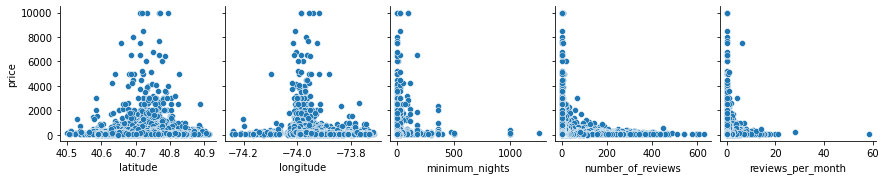

In [14]:
features = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month']
features = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month']
target = ['price']
sns.pairplot(data = df, x_vars= features, y_vars='price')


In [ ]:
sns.jointplot

- 분석 결과 : 중간위치의 위/경도에서 가격대가 다양하게 분포되어 있는 것을 확인,
단 위도 경도가 높거나 낮은 곳은 (주변부) 높은 가격이 드물게 보임  
낮은 가격의 물건이 리뷰가 많음.

### 문제 4. 수치형 데이터와 Price의 상관성 분석하기
- sns.heatmap 사용하기

<Figure size 2000x2000 with 0 Axes>

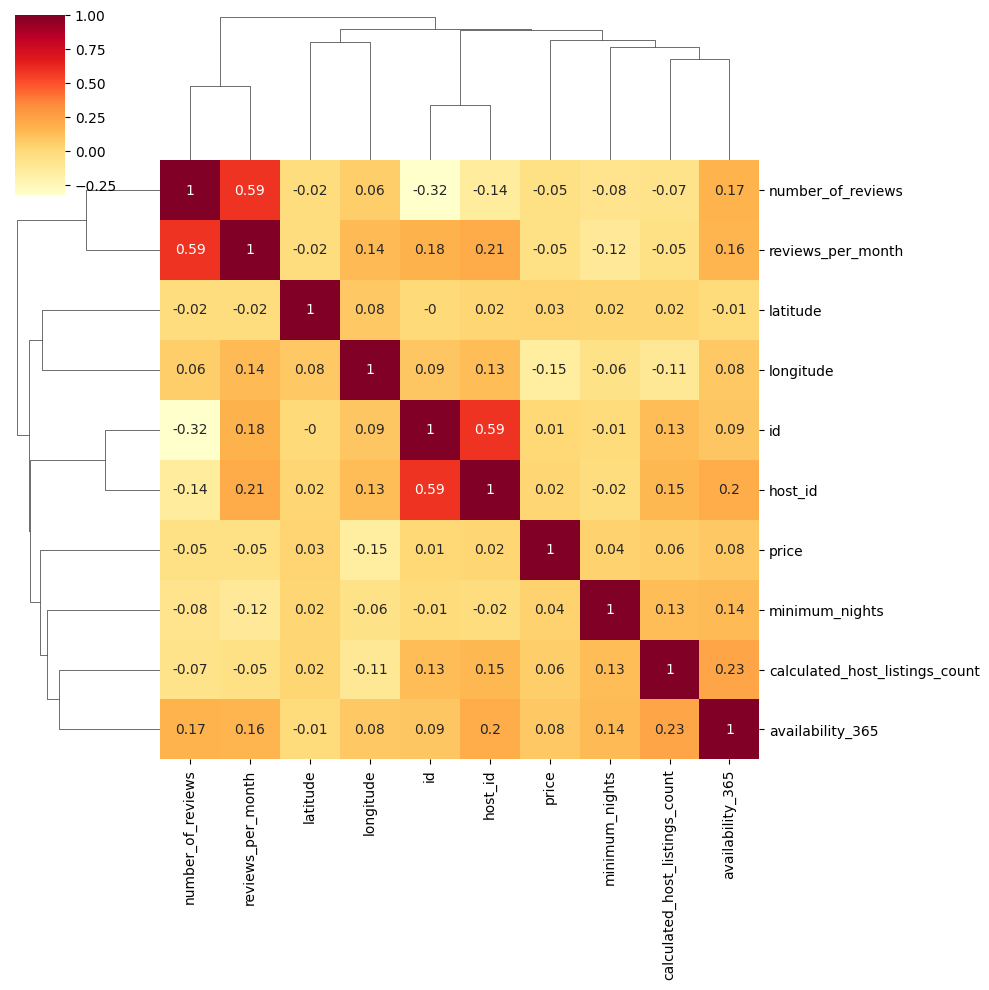

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

sns.clustermap(round(df.corr(),2),
annot = True, cmap = 'YlOrRd'
)

- 분석 결과 : 특정 물건에서 리뷰 수 감소 확인, 리뷰의 수와 월간 리뷰수 높은 상관관계 확인
호스트가 올린 방의 갯수가 많은 것과 365 가능한 예약 은 낮은수준의 양의 상관관계를 보이며, 호스트id와 월간리뷰 수도 약한 상관관계를 보이며
(즉, 일부 운영 노하우가 있는 호스트가 리뷰관리, 365 예약 등 더 나은 서비스를 제공하는 것으로 예상)
경도와 가격간 약한 음의 상관관계 있음


### 문제 5. 범주형 데이터와 Price의 Boxplot  분석하기
- sns.boxplot

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
# df.columns
[(cn, len(df[cn].unique())) for cn in df.columns.difference(features)]

[('availability_365', 366),
 ('calculated_host_listings_count', 47),
 ('host_id', 37457),
 ('host_name', 11453),
 ('id', 48895),
 ('last_review', 1765),
 ('name', 47921),
 ('neighbourhood', 221),
 ('neighbourhood_group', 5),
 ('price', 674),
 ('room_type', 3)]

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

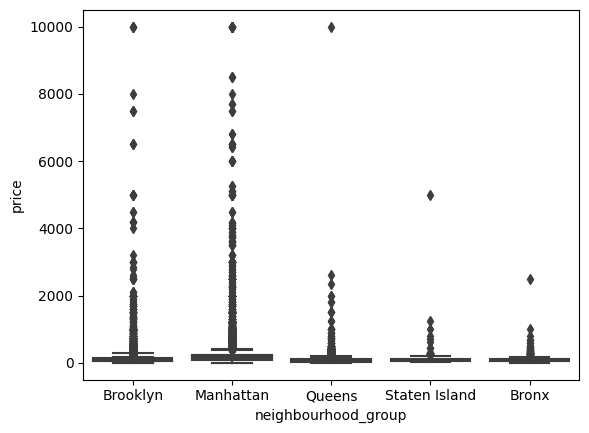

In [18]:
sns.boxplot(data = df , x='room_type', y='price')
sns.boxplot(data = df , x='neighbourhood_group', y='price')
# 데이터를 보기 힘드니 price의 분포를 보자


<AxesSubplot:>

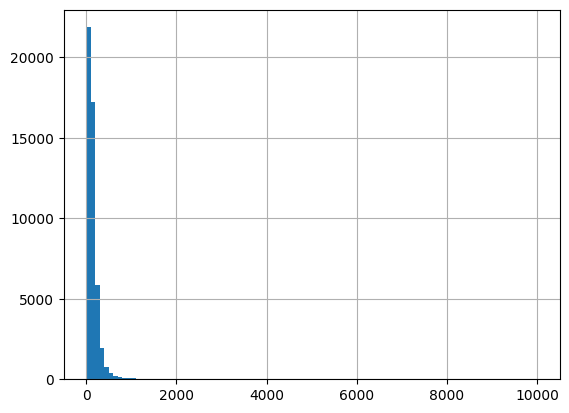

In [19]:
df.price.hist(bins=100)

In [20]:
iqr = df.price.quantile(0.75) - df.price.quantile(0.25)
max = df.price.median() + 1.5*iqr


In [21]:
df_b = df.copy()
outlier = df_b[df_b.price > max]
iqr_o = outlier.price.quantile(0.75) - outlier.price.quantile(0.25)
max_o = outlier.price.median() + 1.5*iqr # 이상치의 맥스치 산정
mean_ = df_b[df_b.price > max_o]['price'].mean() # 이상치의 이상치 초과값은 초과값의 평균
df_b.loc[df_b.price > max_o,'price'] = mean_

<AxesSubplot:xlabel='room_type', ylabel='price'>

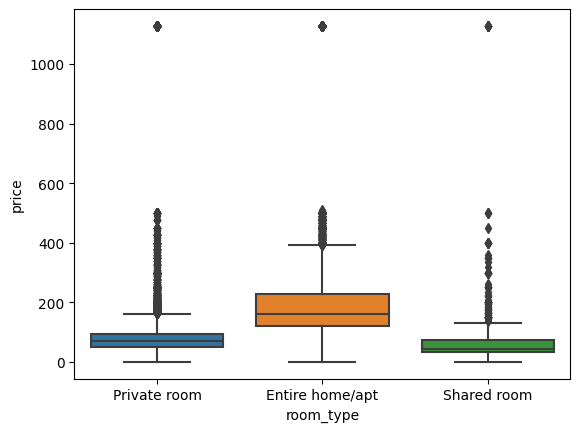

In [22]:
sns.boxplot(data = df_b , x='room_type', y='price')


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

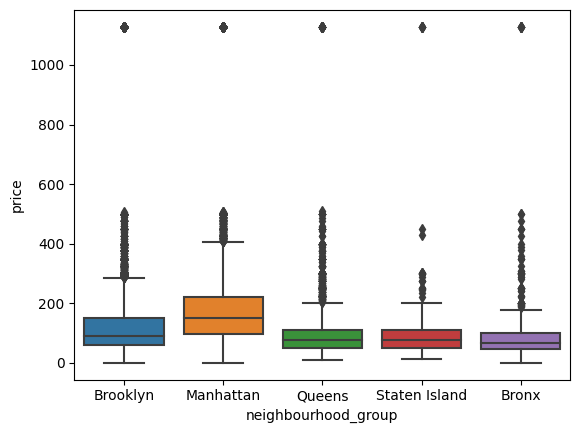

In [23]:
sns.boxplot(data = df_b , x='neighbourhood_group', y='price')



- 분석 결과: 
1. 범주형을 가격으로 보여줄 수 있는 것 확인하기 위해, 각 컬럼의 고유값의 갯수 확인 : room_type, neighbourhood_group을 선택
2. boxplot 그렸으나, 이상치로 인해 (왜도가 너무 커서) 빈도 높은 데이터의 형태 파악이 어려움 : 이상치에 대한 범주 정리 필요
3. 이상치에 대한 이상치 그룹 추출하여, mean으로 통일 : 전체 평균에 영향을 주지 않고, 데이터 형태 파악 가능

### 문제 6. 데이터프레임에서 불필요한 컬럼 제거하기
- 'id', 'name', 'host_name', 'latitude', 'longitude', 'last_review' 를 삭제 

In [40]:
df_c = df_b.copy()
delete = ['id', 'name', 'host_name', 'latitude', 'longitude', 'last_review']
df_c = df_c[df_c.columns.difference(delete)]
df_c

,availability_365,calculated_host_listings_count,host_id,minimum_nights,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type
0,365,6,2787,1,Kensington,Brooklyn,9,149.0,0.21,Private room
1,355,2,2845,1,Midtown,Manhattan,45,225.0,0.38,Entire home/apt
2,365,1,4632,3,Harlem,Manhattan,0,150.0,0.00,Private room
3,194,1,4869,1,Clinton Hill,Brooklyn,270,89.0,4.64,Entire home/apt
4,0,1,7192,10,East Harlem,Manhattan,9,80.0,0.10,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...
48890,9,2,8232441,2,Bedford-Stuyvesant,Brooklyn,0,70.0,0.00,Private room
48891,36,2,6570630,4,Bushwick,Brooklyn,0,40.0,0.00,Private room
48892,27,1,23492952,10,Harlem,Manhattan,0,115.0,0.00,Entire home/apt
48893,2,6,30985759,1,Hell's Kitchen,Manhattan,0,55.0,0.00,Shared room


## Step 3. 데이터 클리닝 수행하기

### 문제 7. 범주형 데이터 분석 및 범주 줄이기
- 범주형 데이터를 분석하여 범주의 수를 확인 하고, 과하게 많을 경우 범주의 수를 줄인다.
- Hint) 
    - 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인
    - apply(lambda) 등으로, 일정 수를 만족하지 못하는 범주는 'others'로 대체

In [41]:
# 범주형 데이터의 unique value 확인
[(cn, len(df_c[cn].unique())) for cn in df_c.columns.difference(features)]

[('availability_365', 366),
 ('calculated_host_listings_count', 47),
 ('host_id', 37457),
 ('neighbourhood', 221),
 ('neighbourhood_group', 5),
 ('price', 460),
 ('room_type', 3)]

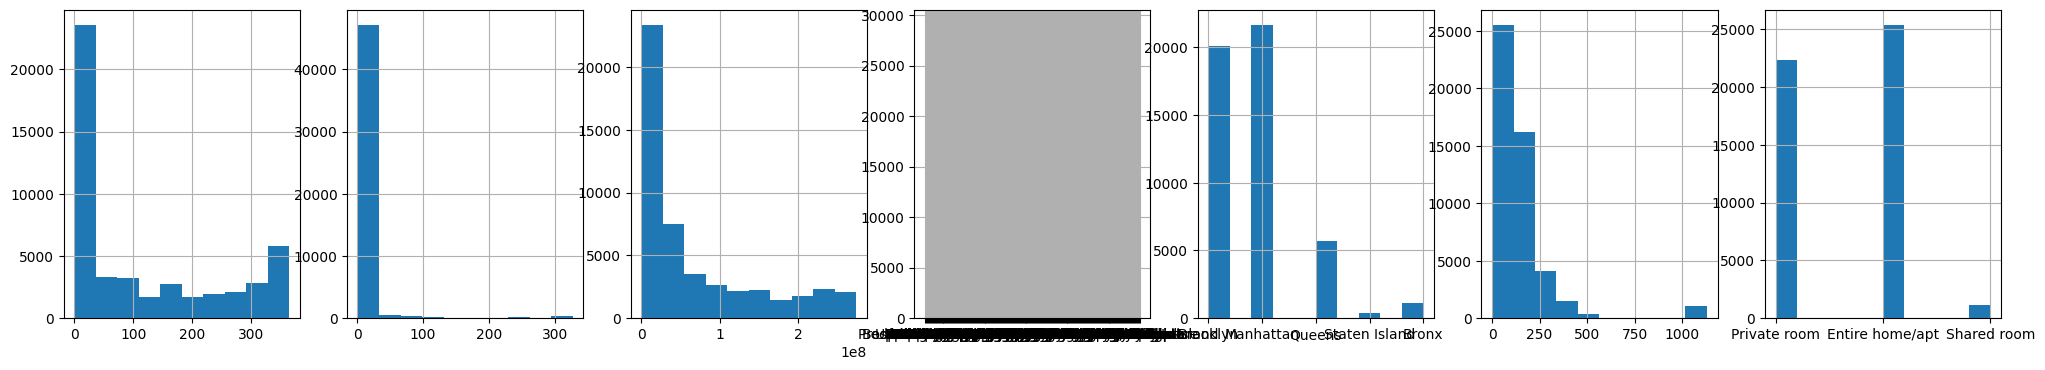

In [42]:
fs = df_c.columns.difference(features)
fig, axs = plt.subplots(nrows=1, ncols=len(fs), figsize=(25, 4))

for i, f in enumerate(fs):
    df_c[f].hist( ax=axs[i])

In [43]:
df_c['calculated_host_listings_count'].value_counts()

1      32303
2       6658
3       2853
4       1440
5        845
6        570
8        416
7        399
327      327
9        234
232      232
10       210
96       192
12       180
13       130
121      121
11       110
52       104
103      103
33        99
49        98
91        91
87        87
15        75
14        70
23        69
34        68
17        68
65        65
31        62
28        56
18        54
25        50
50        50
47        47
43        43
20        40
39        39
37        37
32        32
30        30
29        29
27        27
26        26
21        21
19        19
16        16
Name: calculated_host_listings_count, dtype: int64

In [47]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability_365                0 non-null      object 
 1   calculated_host_listings_count  0 non-null      object 
 2   host_id                         48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   neighbourhood                   48895 non-null  object 
 5   neighbourhood_group             48895 non-null  object 
 6   number_of_reviews               48895 non-null  int64  
 7   price                           48895 non-null  float64
 8   reviews_per_month               48895 non-null  float64
 9   room_type                       48895 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 3.7+ MB


In [64]:
# availability_365는 5개로 축소
df_d = df_c.copy()

df_d['availability_365'] = df_d['availability_365'].apply(lambda x : 'zero' if x == 0 else 'None zero')
df_d['calculated_host_listings_count'] = df_d['calculated_host_listings_count'].apply(lambda x : 'zero' if x==0 else 'None zero')
df_d

,availability_365,calculated_host_listings_count,host_id,minimum_nights,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type
0,None zero,None zero,2787,1,Kensington,Brooklyn,9,149.0,0.21,Private room
1,None zero,None zero,2845,1,Midtown,Manhattan,45,225.0,0.38,Entire home/apt
2,None zero,None zero,4632,3,Harlem,Manhattan,0,150.0,0.00,Private room
3,None zero,None zero,4869,1,Clinton Hill,Brooklyn,270,89.0,4.64,Entire home/apt
4,zero,None zero,7192,10,East Harlem,Manhattan,9,80.0,0.10,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...
48890,None zero,None zero,8232441,2,Bedford-Stuyvesant,Brooklyn,0,70.0,0.00,Private room
48891,None zero,None zero,6570630,4,Bushwick,Brooklyn,0,40.0,0.00,Private room
48892,None zero,None zero,23492952,10,Harlem,Manhattan,0,115.0,0.00,Entire home/apt
48893,None zero,None zero,30985759,1,Hell's Kitchen,Manhattan,0,55.0,0.00,Shared room


### 문제 8. 수치형 데이터 분석 및 범위 정하기
- 수치형 변수의 이상치를 판별하기 위한 최소, 최대 값을 정한다.
- HInt) quantile, sns.rugplot를 활용한다.

In [83]:
print(df_d.select_dtypes(include='number').columns)
print(df_d.select_dtypes(include=object).columns)


Index(['host_id', 'minimum_nights', 'number_of_reviews', 'price',
       'reviews_per_month'],
      dtype='object')
Index(['availability_365', 'calculated_host_listings_count', 'neighbourhood',
       'neighbourhood_group', 'room_type'],
      dtype='object')


- price의 이상치 범위 : 최소는 xx%, 최대는 xx%

- minimum_nights의 이상치 범위 : 최소는 xx%, 최대는 xx%

- availability_365의 이상치 범위 : 최소는 xx%, 최대는 xx%

### 문제 9. 아웃라이어를 제거하고 통계 재분석하기
- price, minimum_nights, availability_365 에 대해 위에서 정한 규칙에 대해 이상치 처리
- quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기
- availability_365가 0인 경우는 is_avail_zero 변수를 추가로 만들어 표시해 준다

### 문제 10. 미기입 데이터 처리하기
- fill(), dropna() 등으로 미기입된 데이터를 처리하기

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리
- 'neighbourhood_group', 'neighbourhood', 'room_type','is_avail_zero', 'review_exists'

In [67]:
df_e = pd.get_dummies(df_d)
df_e

,host_id,minimum_nights,number_of_reviews,price,reviews_per_month,availability_365_None zero,availability_365_zero,calculated_host_listings_count_None zero,neighbourhood_Allerton,neighbourhood_Arden Heights,...,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,1,9,149.0,0.21,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2845,1,45,225.0,0.38,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,4632,3,0,150.0,0.00,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4869,1,270,89.0,4.64,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,7192,10,9,80.0,0.10,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,2,0,70.0,0.00,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
48891,6570630,4,0,40.0,0.00,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
48892,23492952,10,0,115.0,0.00,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
48893,30985759,1,0,55.0,0.00,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기
- StandardScaler를 이용해 수치형 데이터를 표준화하기

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_e[features[2:]] = scaler.fit_transform(df_d[features[2:]])

In [76]:
df_e

,host_id,minimum_nights,number_of_reviews,price,reviews_per_month,availability_365_None zero,availability_365_zero,calculated_host_listings_count_None zero,neighbourhood_Allerton,neighbourhood_Arden Heights,...,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,-0.293996,-0.320414,149.0,-0.551511,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2845,-0.293996,0.487665,225.0,-0.445079,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,4632,-0.196484,-0.522433,150.0,-0.682986,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4869,-0.293996,5.538156,89.0,2.221978,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,7192,0.144807,-0.320414,80.0,-0.620379,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,-0.245240,-0.522433,70.0,-0.682986,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
48891,6570630,-0.147729,-0.522433,40.0,-0.682986,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
48892,23492952,0.144807,-0.522433,115.0,-0.682986,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
48893,30985759,-0.293996,-0.522433,55.0,-0.682986,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### 문제 13. 학습데이터와 테스트데이터 분리하기
- train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split()

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습


### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기


- 분석 결과 : 

### 문제 17. 에러 값의 히스토그램 확인하기


In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test)/y_test


- 분석 결과 : 

In [ ]:
# err의 히스토그램으로 에러값 히스토그램 확인하기
err = (pred - y_test)


- 분석 결과 : 